import important libraries for data cleaning,pre-processing(scaling), visualization(for co-relation), model selection


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow.keras as k
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import time

# Reading the training dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


condition 0: No stress; condition 1: Stress

Selecting label and features from dataset

In [4]:
label = ['condition'] 
features = ['MEAN_RR','RMSSD','pNN25','pNN50','LF','HF','LF_HF']

Scaling the features, ensuring that all features are on the same scale, which is crucial for optimal model performance

In [5]:
scaler = StandardScaler()
scaler.fit(df[features])
df[features] = scaler.transform(df[features])


In [6]:
X = df[features].values
y = df[label].values

In [7]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

Spliting the dataset for training and testing

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)

In [9]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(258502, 7) (258502, 1) (110787, 7) (110787, 1)


In [10]:
y_train = k.utils.to_categorical(y_train) 
y_test = k.utils.to_categorical(y_test)
#which transforms the labels into a categorical format for classification

In [11]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

# Creating Model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(50, activation='relu',kernel_initializer = 'he_normal',input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu',kernel_initializer = 'he_normal'))
model.add(Dense(10, activation='relu',kernel_initializer = 'he_normal'))
model.add(Dense(3, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 50, batch_size = 1024, verbose =1)

Epoch 1/50


253/253 [==============================] - 3s 6ms/step - loss: 0.8276 - accuracy: 0.6327 - val_loss: 0.7018 - val_accuracy: 0.7042
Epoch 2/50
253/253 [==============================] - 1s 4ms/step - loss: 0.6325 - accuracy: 0.7329 - val_loss: 0.5767 - val_accuracy: 0.7545
Epoch 3/50
253/253 [==============================] - 1s 5ms/step - loss: 0.5340 - accuracy: 0.7800 - val_loss: 0.5041 - val_accuracy: 0.7933
Epoch 4/50
253/253 [==============================] - 1s 5ms/step - loss: 0.4708 - accuracy: 0.8100 - val_loss: 0.4510 - val_accuracy: 0.8178
Epoch 5/50
253/253 [==============================] - 1s 5ms/step - loss: 0.4265 - accuracy: 0.8321 - val_loss: 0.4126 - val_accuracy: 0.8373
Epoch 6/50
253/253 [==============================] - 1s 5ms/step - loss: 0.3898 - accuracy: 0.8479 - val_loss: 0.3779 - val_accuracy: 0.8519
Epoch 7/50
253/253 [==============================] - 1s 5ms/step - loss: 0.3592 - accuracy: 0.8623 - val_loss: 0.3491 - val_accuracy: 0.8677
Epoc

We have an accuracy of 95.77% and  validation accuracy of 95.23%

<Axes: >

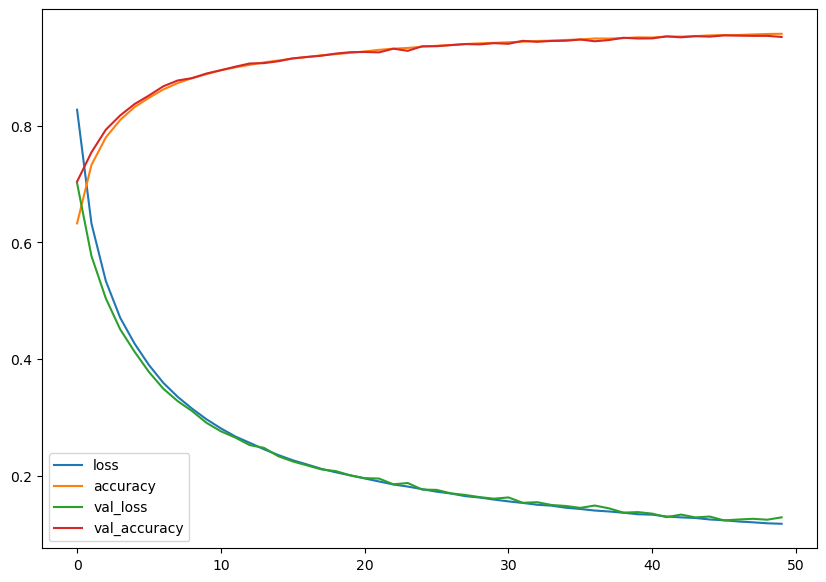

In [16]:
pd.DataFrame(history.history).plot(figsize=(10,7))

we can see above there is a steady decrease in the valiadtion loss and training loss, with no signs of overfitting

# Testing on testset

In [17]:
df_test = pd.read_csv('test.csv')

In [18]:
df_test[features] = scaler.transform(df_test[features])
df_test[features].head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF
0,-1.001159,-0.634891,-0.598837,-0.874583,-0.575814,0.602911,-0.295775
1,-0.024971,1.048686,1.361573,-0.672601,1.080403,-0.280746,-0.157544
2,0.897836,1.544671,1.743894,0.943254,1.965161,-0.511482,0.037412
3,-0.175046,-0.777935,-0.623241,-0.335965,-0.767443,-0.477196,-0.241658
4,-0.721825,-0.393071,-0.476820,-0.201310,-0.735541,-0.089133,-0.280126


In [19]:
X = df_test[features].values
y = df_test[label].values

In [20]:
y = k.utils.to_categorical(y)

In [21]:
loss,acc = model.evaluate(X,y,verbose=1)

1283/1283 [==============================] - 2s 2ms/step - loss: 0.1251 - accuracy: 0.9534


We cans see the accuracy is 95.34%

# Final Pipeline for prediction

In [22]:
data = pd.read_csv('test.csv')

In [24]:
t = scaler.transform(data[features].iloc[5201].values.reshape(1,-1))
print(t)

[[-1.53713909  0.87542554  0.56439365  1.21256363  0.66568458  2.7555339
  -0.29899026]]


C:\Users\SIMRAN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
y_pred = model.predict(t)

1/1 [==============================] - 0s 100ms/step


In [26]:
print(np.argmax(y_pred[0]))
print(data[label].iloc[5201])

1
condition    1
Name: 5201, dtype: int64


Predicted Condition is 1 says : Stress

Lets check for other values

In [27]:
t = scaler.transform(data[features].iloc[5545].values.reshape(1,-1))
print(t)

[[-0.7699341   0.25391942  0.11699709  0.60661783  0.54497884  0.50787441
  -0.26537627]]


C:\Users\SIMRAN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
y_pred = model.predict(t)

1/1 [==============================] - 0s 22ms/step


In [29]:
print(np.argmax(y_pred[0]))
print(data[label].iloc[5545])

0
condition    0
Name: 5545, dtype: int64


Predicted Condition is 0  says : NO Stress

In [30]:
t = scaler.transform(data[features].iloc[41032].values.reshape(1,-1))
print(t)
y_pred = model.predict(t)
print(np.argmax(y_pred[0]))
print(data[label].iloc[41032])

[[ 0.17166695 -0.77559868 -0.74525811 -0.87458304 -0.45972564 -0.64973772
  -0.1273582 ]]
1/1 [==============================] - 0s 24ms/step
2
condition    2
Name: 41032, dtype: int64


C:\Users\SIMRAN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted condition is 2 says: High Stress